# Results Analysis: Teaching VMs Subjective Concepts with Language


## 1. Setup and Data Loading


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 11

In [ ]:
# Load the labeled data
# Skip the first row which contains description text
df = pd.read_csv("Labeles.csv", skiprows=1)

# Clean column names (remove trailing spaces)
df.columns = df.columns.str.strip()

print(f"Total records: {len(df)}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Total records: 440

Dataset shape: (440, 12)

Columns: ['query_text', 'dataset', 'query_type', 'positive', 'negative', 'method', 'image_number', 'image_link', 'annotator_1', 'annotator_2', 'annotator_3', 'aggregate']


In [3]:
# Display first few rows
df.head(15)

,query_text,dataset,query_type,positive,negative,method,image_number,image_link,annotator_1,annotator_2,annotator_3,aggregate
0,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,1,stanford_golden retriever.png,1,1,1,1
1,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,2,stanford_golden retriever.png,1,1,1,1
2,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,3,stanford_golden retriever.png,0,0,1,0
3,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,4,stanford_golden retriever.png,0,0,0,0
4,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,5,stanford_golden retriever.png,0,0,0,0
5,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,6,stanford_golden retriever.png,1,1,1,1
6,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,7,stanford_golden retriever.png,0,0,0,0
7,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,8,stanford_golden retriever.png,1,1,1,1
8,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,9,stanford_golden retriever.png,0,1,1,1
9,a golder retriever,stanford_dogs,objective,NaN,NaN,CLIP,10,stanford_golden retriever.png,0,1,1,1


## 2. Data Overview and Statistics


In [ ]:
# Basic statistics
print("\n=== EXPERIMENTAL SETUP ===")
print(f"\nDatasets: {df['dataset'].unique()}")
print(f"Number of datasets: {df['dataset'].nunique()}")

print(f"\nQuery types: {df['query_type'].unique()}")
print(f"Number of query types: {df['query_type'].nunique()}")

print(f"\nMethods: {df['method'].unique()}")
print(f"Number of methods: {df['method'].nunique()}")

print(f"\nUnique queries: {df['query_text'].nunique()}")
print("\nQuery list:")
for i, query in enumerate(df["query_text"].unique(), 1):
    query_type = df[df["query_text"] == query]["query_type"].iloc[0]
    dataset = df[df["query_text"] == query]["dataset"].iloc[0]
    print(f"  {i}. [{dataset}] [{query_type}] {query}")


=== EXPERIMENTAL SETUP ===

Datasets: ['stanford_dogs' 'flicker' 'celebA']
Number of datasets: 3

Query types: ['objective' 'subjective']
Number of query types: 2

Methods: ['CLIP' 'Feedback']
Number of methods: 2

Unique queries: 22

Query list:
  1. [stanford_dogs] [objective] a golder retriever
  2. [stanford_dogs] [objective] a dog on a beach
  3. [stanford_dogs] [subjective] a dog looking guilty
  4. [stanford_dogs] [subjective] a friendly looking dog
  5. [stanford_dogs] [subjective] an agressive looking dog
  6. [stanford_dogs] [subjective] a nervous looking dog
  7. [stanford_dogs] [subjective] a hyperactive dog
  8. [flicker] [objective] a person riding a bicycle
  9. [flicker] [objective] a dog playing
  10. [flicker] [subjective] an exciting action scene
  11. [flicker] [subjective] a joyful moment
  12. [flicker] [subjective] kid having fun
  13. [flicker] [subjective] a peaceful scene
  14. [flicker] [subjective] a photo with motion blur
  15. [celebA] [objective] a perso

In [ ]:
# Count breakdown
print("\n=== RECORD COUNTS ===")
print("\nBy Dataset:")
print(df["dataset"].value_counts())

print("\nBy Query Type:")
print(df["query_type"].value_counts())

print("\nBy Method:")
print(df["method"].value_counts())

print("\nBy Dataset x Query Type:")
print(pd.crosstab(df["dataset"], df["query_type"]))

print("\nBy Method x Query Type:")
print(pd.crosstab(df["method"], df["query_type"]))


=== RECORD COUNTS ===

By Dataset:
dataset
celebA           160
stanford_dogs    140
flicker          140
Name: count, dtype: int64

By Query Type:
query_type
subjective    320
objective     120
Name: count, dtype: int64

By Method:
method
CLIP        220
Feedback    220
Name: count, dtype: int64

By Dataset x Query Type:
query_type     objective  subjective
dataset                             
celebA                40         120
flicker               40         100
stanford_dogs         40         100

By Method x Query Type:
query_type  objective  subjective
method                           
CLIP               60         160
Feedback           60         160


## 3. Precision@K Calculation


In [ ]:
def calculate_precision_at_k(df: pd.DataFrame, k: int) -> pd.DataFrame:
    """
    Calculate Precision@K for each query-method combination.

    Precision@K = (Number of relevant items in top K) / K

    Args:
        df: DataFrame with columns including 'query_text', 'method', 'image_number', 'aggregate'
        k: The K value (5 or 10)

    Returns:
        DataFrame with precision scores for each query-method combination
    """
    results = []

    # Group by query and method
    for (query, method), group in df.groupby(["query_text", "method"]):
        # Sort by image number and take top K
        top_k = group.sort_values("image_number").head(k)

        # Count relevant items (aggregate = 1)
        relevant_count = top_k["aggregate"].sum()

        # Calculate precision
        precision = relevant_count / k

        # Get additional info
        dataset = group["dataset"].iloc[0]
        query_type = group["query_type"].iloc[0]

        results.append(
            {
                "query": query,
                "dataset": dataset,
                "query_type": query_type,
                "method": method,
                f"precision@{k}": precision,
                "relevant_in_top_k": relevant_count,
                "k": k,
            }
        )

    return pd.DataFrame(results)


# Calculate Precision@5 and Precision@10
precision_5 = calculate_precision_at_k(df, k=5)
precision_10 = calculate_precision_at_k(df, k=10)

print("\n=== PRECISION@5 ===")
print(precision_5.head(10))

print("\n=== PRECISION@10 ===")
print(precision_10.head(10))


=== PRECISION@5 ===
                    query        dataset  query_type    method  precision@5  \
0    a dog looking guilty  stanford_dogs  subjective      CLIP          0.4   
1    a dog looking guilty  stanford_dogs  subjective  Feedback          1.0   
2        a dog on a beach  stanford_dogs   objective      CLIP          1.0   
3        a dog on a beach  stanford_dogs   objective  Feedback          1.0   
4           a dog playing        flicker   objective      CLIP          0.8   
5           a dog playing        flicker   objective  Feedback          1.0   
6  a friendly looking dog  stanford_dogs  subjective      CLIP          0.4   
7  a friendly looking dog  stanford_dogs  subjective  Feedback          0.6   
8      a golder retriever  stanford_dogs   objective      CLIP          0.4   
9      a golder retriever  stanford_dogs   objective  Feedback          0.8   

   relevant_in_top_k  k  
0                  2  5  
1                  5  5  
2                  5  5  
3    

## 4. Overall Performance Comparison


In [ ]:
# Average precision by method
print("\n=== AVERAGE PRECISION BY METHOD ===")
print("\nPrecision@5:")
p5_by_method = precision_5.groupby("method")["precision@5"].agg(["mean", "std", "min", "max"])
print(p5_by_method)

print("\nPrecision@10:")
p10_by_method = precision_10.groupby("method")["precision@10"].agg(["mean", "std", "min", "max"])
print(p10_by_method)


=== AVERAGE PRECISION BY METHOD ===

Precision@5:
              mean       std  min  max
method                                
CLIP      0.636364  0.318546  0.2  1.0
Feedback  0.827273  0.177769  0.4  1.0

Precision@10:
              mean       std  min  max
method                                
CLIP      0.604545  0.298372  0.1  1.0
Feedback  0.790909  0.184930  0.4  1.0


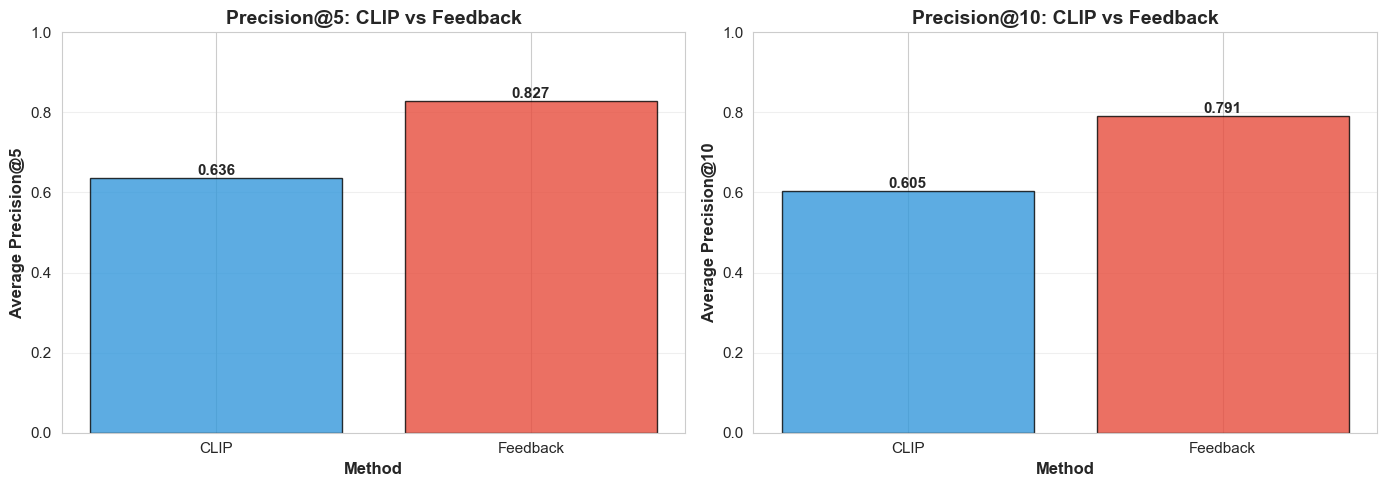


Feedback improvement over CLIP:
  Precision@5:  +30.00%
  Precision@10: +30.83%


In [ ]:
# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Precision@5
p5_summary = precision_5.groupby("method")["precision@5"].mean().reset_index()
ax1 = axes[0]
bars1 = ax1.bar(p5_summary["method"], p5_summary["precision@5"], color=["#3498db", "#e74c3c"], alpha=0.8, edgecolor="black")
ax1.set_ylabel("Average Precision@5", fontsize=12, fontweight="bold")
ax1.set_xlabel("Method", fontsize=12, fontweight="bold")
ax1.set_title("Precision@5: CLIP vs Feedback", fontsize=14, fontweight="bold")
ax1.set_ylim([0, 1])
ax1.grid(axis="y", alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.3f}", ha="center", va="bottom", fontweight="bold")

# Precision@10
p10_summary = precision_10.groupby("method")["precision@10"].mean().reset_index()
ax2 = axes[1]
bars2 = ax2.bar(p10_summary["method"], p10_summary["precision@10"], color=["#3498db", "#e74c3c"], alpha=0.8, edgecolor="black")
ax2.set_ylabel("Average Precision@10", fontsize=12, fontweight="bold")
ax2.set_xlabel("Method", fontsize=12, fontweight="bold")
ax2.set_title("Precision@10: CLIP vs Feedback", fontsize=14, fontweight="bold")
ax2.set_ylim([0, 1])
ax2.grid(axis="y", alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.3f}", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

# Calculate improvement
improvement_p5 = (
    (p5_summary[p5_summary["method"] == "Feedback"]["precision@5"].values[0] - p5_summary[p5_summary["method"] == "CLIP"]["precision@5"].values[0])
    / p5_summary[p5_summary["method"] == "CLIP"]["precision@5"].values[0]
) * 100

improvement_p10 = (
    (p10_summary[p10_summary["method"] == "Feedback"]["precision@10"].values[0] - p10_summary[p10_summary["method"] == "CLIP"]["precision@10"].values[0])
    / p10_summary[p10_summary["method"] == "CLIP"]["precision@10"].values[0]
) * 100

print("\nFeedback improvement over CLIP:")
print(f"  Precision@5:  {improvement_p5:+.2f}%")
print(f"  Precision@10: {improvement_p10:+.2f}%")

## 5. Performance by Query Type (Objective vs Subjective)


In [ ]:
# Average precision by query type and method
print("\n=== PRECISION BY QUERY TYPE ===")
print("\nPrecision@5:")
p5_by_type = precision_5.groupby(["query_type", "method"])["precision@5"].mean().unstack()
print(p5_by_type)

print("\nPrecision@10:")
p10_by_type = precision_10.groupby(["query_type", "method"])["precision@10"].mean().unstack()
print(p10_by_type)


=== PRECISION BY QUERY TYPE ===

Precision@5:
method          CLIP  Feedback
query_type                    
objective   0.833333  0.933333
subjective  0.562500  0.787500

Precision@10:
method          CLIP  Feedback
query_type                    
objective   0.833333  0.866667
subjective  0.518750  0.762500


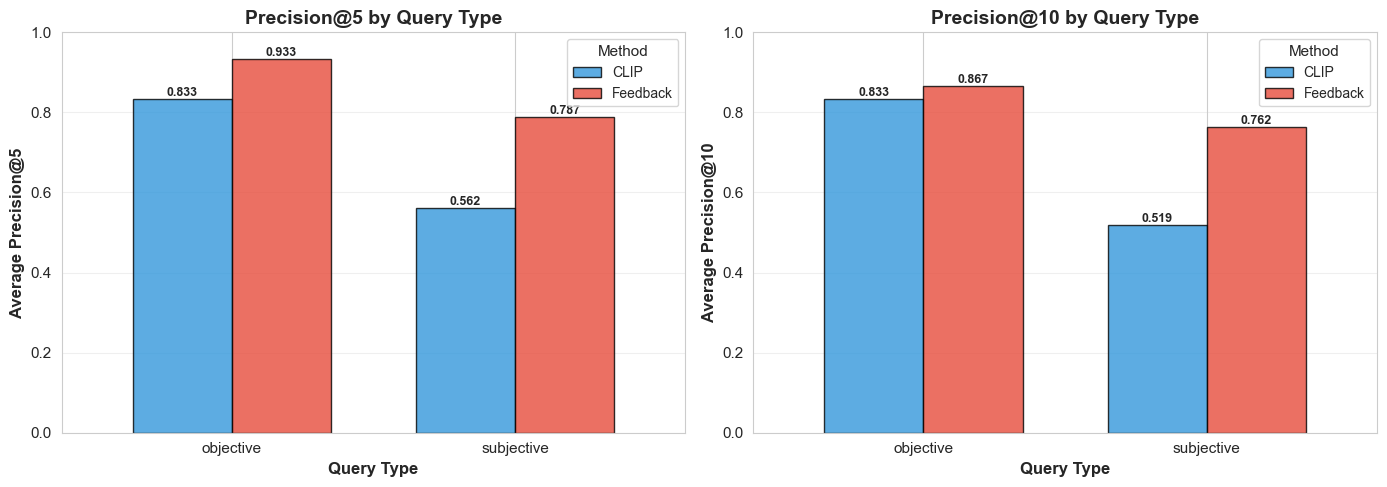

In [ ]:
# Visualize performance by query type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Precision@5 by query type
ax1 = axes[0]
p5_by_type.plot(kind="bar", ax=ax1, color=["#3498db", "#e74c3c"], alpha=0.8, edgecolor="black", width=0.7)
ax1.set_ylabel("Average Precision@5", fontsize=12, fontweight="bold")
ax1.set_xlabel("Query Type", fontsize=12, fontweight="bold")
ax1.set_title("Precision@5 by Query Type", fontsize=14, fontweight="bold")
ax1.set_ylim([0, 1])
ax1.legend(title="Method", fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis="y", alpha=0.3)

# Add value labels
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.3f", fontsize=9, fontweight="bold")

# Precision@10 by query type
ax2 = axes[1]
p10_by_type.plot(kind="bar", ax=ax2, color=["#3498db", "#e74c3c"], alpha=0.8, edgecolor="black", width=0.7)
ax2.set_ylabel("Average Precision@10", fontsize=12, fontweight="bold")
ax2.set_xlabel("Query Type", fontsize=12, fontweight="bold")
ax2.set_title("Precision@10 by Query Type", fontsize=14, fontweight="bold")
ax2.set_ylim([0, 1])
ax2.legend(title="Method", fontsize=10)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis="y", alpha=0.3)

# Add value labels
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.3f", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
# Calculate improvement by query type
print("\n=== FEEDBACK IMPROVEMENT BY QUERY TYPE ===")

for query_type in ["objective", "subjective"]:
    clip_p5 = p5_by_type.loc[query_type, "CLIP"]
    feedback_p5 = p5_by_type.loc[query_type, "Feedback"]
    improvement_p5 = ((feedback_p5 - clip_p5) / clip_p5) * 100

    clip_p10 = p10_by_type.loc[query_type, "CLIP"]
    feedback_p10 = p10_by_type.loc[query_type, "Feedback"]
    improvement_p10 = ((feedback_p10 - clip_p10) / clip_p10) * 100

    print(f"\n{query_type.upper()}:")
    print(f"  Precision@5:  {improvement_p5:+.2f}% (CLIP: {clip_p5:.3f}, Feedback: {feedback_p5:.3f})")
    print(f"  Precision@10: {improvement_p10:+.2f}% (CLIP: {clip_p10:.3f}, Feedback: {feedback_p10:.3f})")


=== FEEDBACK IMPROVEMENT BY QUERY TYPE ===

OBJECTIVE:
  Precision@5:  +12.00% (CLIP: 0.833, Feedback: 0.933)
  Precision@10: +4.00% (CLIP: 0.833, Feedback: 0.867)

SUBJECTIVE:
  Precision@5:  +40.00% (CLIP: 0.562, Feedback: 0.787)
  Precision@10: +46.99% (CLIP: 0.519, Feedback: 0.762)


## 6. Performance by Dataset


In [ ]:
# Average precision by dataset and method
print("\n=== PRECISION BY DATASET ===")
print("\nPrecision@5:")
p5_by_dataset = precision_5.groupby(["dataset", "method"])["precision@5"].mean().unstack()
print(p5_by_dataset)

print("\nPrecision@10:")
p10_by_dataset = precision_10.groupby(["dataset", "method"])["precision@10"].mean().unstack()
print(p10_by_dataset)


=== PRECISION BY DATASET ===

Precision@5:
method             CLIP  Feedback
dataset                          
celebA         0.600000  0.825000
flicker        0.800000  0.885714
stanford_dogs  0.514286  0.771429

Precision@10:
method             CLIP  Feedback
dataset                          
celebA         0.575000  0.775000
flicker        0.728571  0.857143
stanford_dogs  0.514286  0.742857


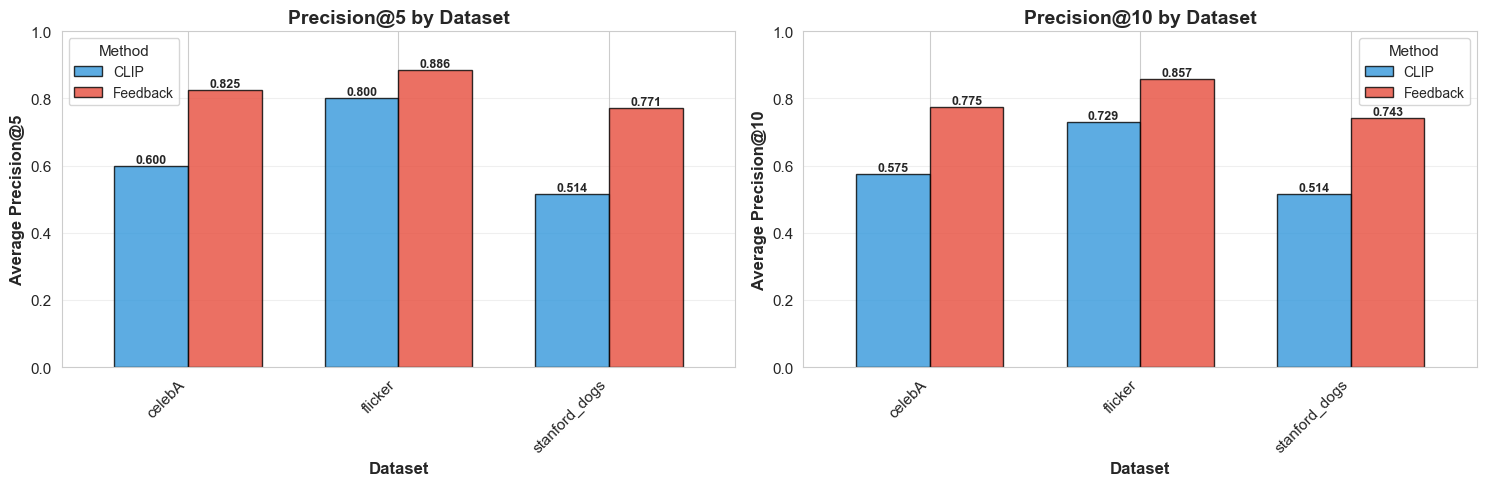

In [ ]:
# Visualize performance by dataset
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Precision@5 by dataset
ax1 = axes[0]
p5_by_dataset.plot(kind="bar", ax=ax1, color=["#3498db", "#e74c3c"], alpha=0.8, edgecolor="black", width=0.7)
ax1.set_ylabel("Average Precision@5", fontsize=12, fontweight="bold")
ax1.set_xlabel("Dataset", fontsize=12, fontweight="bold")
ax1.set_title("Precision@5 by Dataset", fontsize=14, fontweight="bold")
ax1.set_ylim([0, 1])
ax1.legend(title="Method", fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
ax1.grid(axis="y", alpha=0.3)

# Add value labels
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.3f", fontsize=9, fontweight="bold")

# Precision@10 by dataset
ax2 = axes[1]
p10_by_dataset.plot(kind="bar", ax=ax2, color=["#3498db", "#e74c3c"], alpha=0.8, edgecolor="black", width=0.7)
ax2.set_ylabel("Average Precision@10", fontsize=12, fontweight="bold")
ax2.set_xlabel("Dataset", fontsize=12, fontweight="bold")
ax2.set_title("Precision@10 by Dataset", fontsize=14, fontweight="bold")
ax2.set_ylim([0, 1])
ax2.legend(title="Method", fontsize=10)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
ax2.grid(axis="y", alpha=0.3)

# Add value labels
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.3f", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()

## 7. Per-Query Analysis


In [ ]:
# Detailed per-query comparison
print("\n=== DETAILED PER-QUERY RESULTS ===")

# Merge precision@5 and precision@10 for each query
per_query = precision_5.merge(precision_10[["query", "method", "precision@10"]], on=["query", "method"])

# Pivot to compare methods side by side
per_query_pivot = per_query.pivot_table(index=["query", "dataset", "query_type"], columns="method", values=["precision@5", "precision@10"]).round(3)

print(per_query_pivot)


=== DETAILED PER-QUERY RESULTS ===
                                                     precision@10           \
method                                                       CLIP Feedback   
query                       dataset       query_type                         
a dog looking guilty        stanford_dogs subjective          0.6      0.9   
a dog on a beach            stanford_dogs objective           0.9      0.9   
a dog playing               flicker       objective           0.8      0.9   
a friendly looking dog      stanford_dogs subjective          0.4      0.8   
a golder retriever          stanford_dogs objective           0.6      0.6   
a hyperactive dog           stanford_dogs subjective          0.8      0.9   
a joyful moment             flicker       subjective          0.8      0.8   
a nervous looking dog       stanford_dogs subjective          0.1      0.6   
a peaceful scene            flicker       subjective          0.9      1.0   
a person looking confident  

In [ ]:
# Calculate improvement for each query
improvement_df = []

for query in per_query["query"].unique():
    query_data = per_query[per_query["query"] == query]

    clip_row = query_data[query_data["method"] == "CLIP"].iloc[0]
    feedback_row = query_data[query_data["method"] == "Feedback"].iloc[0]

    improvement_p5 = feedback_row["precision@5"] - clip_row["precision@5"]
    improvement_p10 = feedback_row["precision@10"] - clip_row["precision@10"]

    improvement_df.append(
        {
            "query": query,
            "dataset": clip_row["dataset"],
            "query_type": clip_row["query_type"],
            "improvement_p5": improvement_p5,
            "improvement_p10": improvement_p10,
            "clip_p5": clip_row["precision@5"],
            "feedback_p5": feedback_row["precision@5"],
            "clip_p10": clip_row["precision@10"],
            "feedback_p10": feedback_row["precision@10"],
        }
    )

improvement_df = pd.DataFrame(improvement_df)

print("\n=== IMPROVEMENT PER QUERY ===")
print(improvement_df.sort_values("improvement_p10", ascending=False))


=== IMPROVEMENT PER QUERY ===
                          query        dataset  query_type  improvement_p5  \
7         a nervous looking dog  stanford_dogs  subjective             0.2   
3        a friendly looking dog  stanford_dogs  subjective             0.2   
12         a person looking sad         celebA  subjective             0.4   
14       a person looking tired         celebA  subjective             0.6   
9    a person looking confident         celebA  subjective             0.4   
0          a dog looking guilty  stanford_dogs  subjective             0.6   
21               kid having fun        flicker  subjective             0.2   
19     an agressive looking dog  stanford_dogs  subjective             0.6   
10      a person looking guilty         celebA  subjective             0.0   
13  a person looking suspicious         celebA  subjective             0.4   
18     a photo with motion blur        flicker  subjective             0.2   
15    a person riding a bicycle  

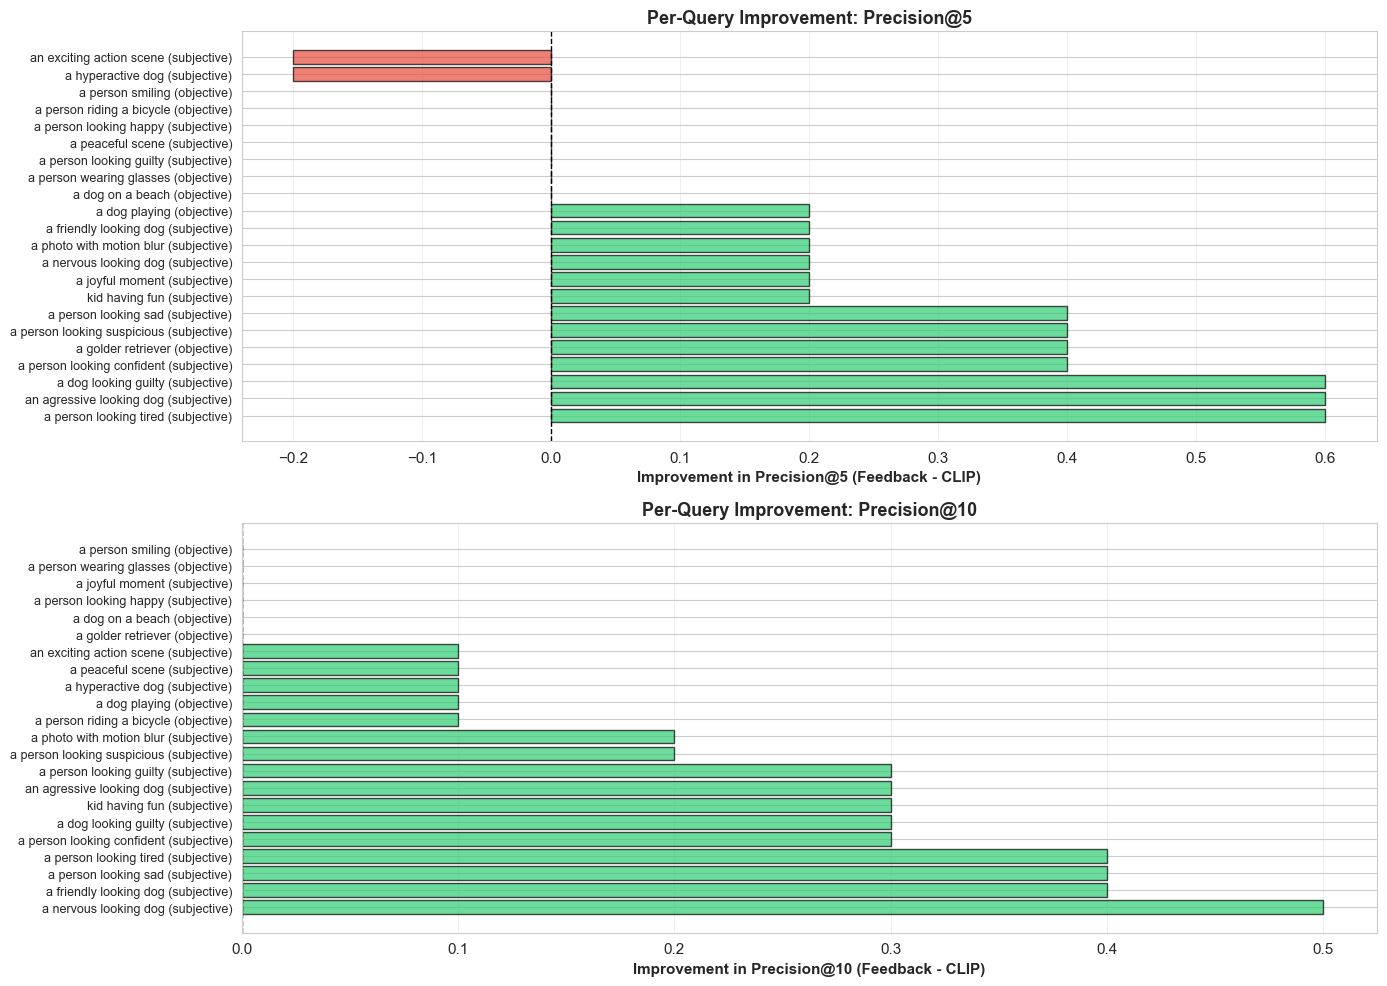

In [ ]:
# Visualize improvement distribution
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Sort by improvement
improvement_sorted_p5 = improvement_df.sort_values("improvement_p5", ascending=False)
improvement_sorted_p10 = improvement_df.sort_values("improvement_p10", ascending=False)

# Precision@5 improvement
ax1 = axes[0]
colors = ["#2ecc71" if x >= 0 else "#e74c3c" for x in improvement_sorted_p5["improvement_p5"]]
bars1 = ax1.barh(range(len(improvement_sorted_p5)), improvement_sorted_p5["improvement_p5"], color=colors, alpha=0.7, edgecolor="black")
ax1.set_yticks(range(len(improvement_sorted_p5)))
ax1.set_yticklabels([f"{row['query']} ({row['query_type']})" for _, row in improvement_sorted_p5.iterrows()], fontsize=9)
ax1.set_xlabel("Improvement in Precision@5 (Feedback - CLIP)", fontsize=11, fontweight="bold")
ax1.set_title("Per-Query Improvement: Precision@5", fontsize=13, fontweight="bold")
ax1.axvline(x=0, color="black", linestyle="--", linewidth=1)
ax1.grid(axis="x", alpha=0.3)

# Precision@10 improvement
ax2 = axes[1]
colors = ["#2ecc71" if x >= 0 else "#e74c3c" for x in improvement_sorted_p10["improvement_p10"]]
bars2 = ax2.barh(range(len(improvement_sorted_p10)), improvement_sorted_p10["improvement_p10"], color=colors, alpha=0.7, edgecolor="black")
ax2.set_yticks(range(len(improvement_sorted_p10)))
ax2.set_yticklabels([f"{row['query']} ({row['query_type']})" for _, row in improvement_sorted_p10.iterrows()], fontsize=9)
ax2.set_xlabel("Improvement in Precision@10 (Feedback - CLIP)", fontsize=11, fontweight="bold")
ax2.set_title("Per-Query Improvement: Precision@10", fontsize=13, fontweight="bold")
ax2.axvline(x=0, color="black", linestyle="--", linewidth=1)
ax2.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Statistical Significance Testing


In [ ]:
from scipy import stats

# Paired t-test for precision@5
clip_p5 = precision_5[precision_5["method"] == "CLIP"]["precision@5"].values
feedback_p5 = precision_5[precision_5["method"] == "Feedback"]["precision@5"].values
t_stat_p5, p_value_p5 = stats.ttest_rel(feedback_p5, clip_p5)

# Paired t-test for precision@10
clip_p10 = precision_10[precision_10["method"] == "CLIP"]["precision@10"].values
feedback_p10 = precision_10[precision_10["method"] == "Feedback"]["precision@10"].values
t_stat_p10, p_value_p10 = stats.ttest_rel(feedback_p10, clip_p10)

print("\n=== STATISTICAL SIGNIFICANCE (PAIRED T-TEST) ===")
print("\nPrecision@5:")
print(f"  t-statistic: {t_stat_p5:.4f}")
print(f"  p-value: {p_value_p5:.4f}")
print(f"  Significant at Î±=0.05: {'YES' if p_value_p5 < 0.05 else 'NO'}")

print("\nPrecision@10:")
print(f"  t-statistic: {t_stat_p10:.4f}")
print(f"  p-value: {p_value_p10:.4f}")
print(f"  Significant at Î±=0.05: {'YES' if p_value_p10 < 0.05 else 'NO'}")


=== STATISTICAL SIGNIFICANCE (PAIRED T-TEST) ===

Precision@5:
  t-statistic: 3.6877
  p-value: 0.0014
  Significant at Î±=0.05: YES

Precision@10:
  t-statistic: 5.4215
  p-value: 0.0000
  Significant at Î±=0.05: YES


## 9. Inter-Annotator Agreement Analysis


In [ ]:
# Calculate inter-annotator agreement
from sklearn.metrics import cohen_kappa_score

# Pairwise Cohen's Kappa
kappa_12 = cohen_kappa_score(df["annotator_1"], df["annotator_2"])
kappa_13 = cohen_kappa_score(df["annotator_1"], df["annotator_3"])
kappa_23 = cohen_kappa_score(df["annotator_2"], df["annotator_3"])

print("\n=== INTER-ANNOTATOR AGREEMENT (COHEN'S KAPPA) ===")
print(f"\nAnnotator 1 vs Annotator 2: {kappa_12:.3f}")
print(f"Annotator 1 vs Annotator 3: {kappa_13:.3f}")
print(f"Annotator 2 vs Annotator 3: {kappa_23:.3f}")
print(f"\nAverage Kappa: {np.mean([kappa_12, kappa_13, kappa_23]):.3f}")

# Agreement interpretation
avg_kappa = np.mean([kappa_12, kappa_13, kappa_23])
if avg_kappa < 0:
    agreement = "Poor"
elif avg_kappa < 0.20:
    agreement = "Slight"
elif avg_kappa < 0.40:
    agreement = "Fair"
elif avg_kappa < 0.60:
    agreement = "Moderate"
elif avg_kappa < 0.80:
    agreement = "Substantial"
else:
    agreement = "Almost Perfect"

print(f"\nAgreement Level: {agreement}")


=== INTER-ANNOTATOR AGREEMENT (COHEN'S KAPPA) ===

Annotator 1 vs Annotator 2: 0.752
Annotator 1 vs Annotator 3: 0.613
Annotator 2 vs Annotator 3: 0.749

Average Kappa: 0.704

Agreement Level: Substantial


In [ ]:
# Calculate percentage agreement
perfect_agreement = ((df["annotator_1"] == df["annotator_2"]) & (df["annotator_2"] == df["annotator_3"])).sum()
majority_agreement = (df["aggregate"].isin([0, 1])).sum()  # At least 2 annotators agree

print("\n=== AGREEMENT STATISTICS ===")
print(f"\nPerfect Agreement (all 3 annotators): {perfect_agreement}/{len(df)} ({perfect_agreement / len(df) * 100:.1f}%)")
print(f"Majority Agreement (at least 2 annotators): {majority_agreement}/{len(df)} ({majority_agreement / len(df) * 100:.1f}%)")

# Distribution of annotator scores
print("\nAnnotator Label Distributions:")
print(f"  Annotator 1 - Relevant: {df['annotator_1'].sum()}/{len(df)} ({df['annotator_1'].mean() * 100:.1f}%)")
print(f"  Annotator 2 - Relevant: {df['annotator_2'].sum()}/{len(df)} ({df['annotator_2'].mean() * 100:.1f}%)")
print(f"  Annotator 3 - Relevant: {df['annotator_3'].sum()}/{len(df)} ({df['annotator_3'].mean() * 100:.1f}%)")
print(f"  Aggregate   - Relevant: {df['aggregate'].sum()}/{len(df)} ({df['aggregate'].mean() * 100:.1f}%)")


=== AGREEMENT STATISTICS ===

Perfect Agreement (all 3 annotators): 357/440 (81.1%)
Majority Agreement (at least 2 annotators): 440/440 (100.0%)

Annotator Label Distributions:
  Annotator 1 - Relevant: 296/440 (67.3%)
  Annotator 2 - Relevant: 309/440 (70.2%)
  Annotator 3 - Relevant: 311/440 (70.7%)
  Aggregate   - Relevant: 307/440 (69.8%)


## Summary


In [ ]:
# Create comprehensive summary table
summary_data = []

for query_type in ["objective", "subjective"]:
    for method in ["CLIP", "Feedback"]:
        p5_data = precision_5[(precision_5["query_type"] == query_type) & (precision_5["method"] == method)]
        p10_data = precision_10[(precision_10["query_type"] == query_type) & (precision_10["method"] == method)]

        summary_data.append(
            {
                "Query Type": query_type.capitalize(),
                "Method": method,
                "Precision@5 (Mean)": p5_data["precision@5"].mean(),
                "Precision@5 (Std)": p5_data["precision@5"].std(),
                "Precision@10 (Mean)": p10_data["precision@10"].mean(),
                "Precision@10 (Std)": p10_data["precision@10"].std(),
                "N": len(p5_data),
            }
        )

summary_table = pd.DataFrame(summary_data)
print("\n=== SUMMARY TABLE BY QUERY TYPE ===")
print(summary_table.round(3))


=== SUMMARY TABLE BY QUERY TYPE ===
   Query Type    Method  Precision@5 (Mean)  Precision@5 (Std)  \
0   Objective      CLIP               0.833              0.234   
1   Objective  Feedback               0.933              0.103   
2  Subjective      CLIP               0.562              0.320   
3  Subjective  Feedback               0.788              0.186   

   Precision@10 (Mean)  Precision@10 (Std)   N  
0                0.833               0.163   6  
1                0.867               0.151   6  
2                0.519               0.295  16  
3                0.762               0.193  16  


In [ ]:
# Create dataset summary table
dataset_summary = []

for dataset in df["dataset"].unique():
    for method in ["CLIP", "Feedback"]:
        p5_data = precision_5[(precision_5["dataset"] == dataset) & (precision_5["method"] == method)]
        p10_data = precision_10[(precision_10["dataset"] == dataset) & (precision_10["method"] == method)]

        dataset_summary.append(
            {
                "Dataset": dataset,
                "Method": method,
                "Precision@5": p5_data["precision@5"].mean(),
                "Precision@10": p10_data["precision@10"].mean(),
                "N Queries": len(p5_data),
            }
        )

dataset_summary_table = pd.DataFrame(dataset_summary)
print("\n=== SUMMARY TABLE BY DATASET ===")
print(dataset_summary_table.round(3))


=== SUMMARY TABLE BY DATASET ===
         Dataset    Method  Precision@5  Precision@10  N Queries
0  stanford_dogs      CLIP        0.514         0.514          7
1  stanford_dogs  Feedback        0.771         0.743          7
2        flicker      CLIP        0.800         0.729          7
3        flicker  Feedback        0.886         0.857          7
4         celebA      CLIP        0.600         0.575          8
5         celebA  Feedback        0.825         0.775          8


In [28]:
# Overall performance
overall_clip_p5 = precision_5[precision_5["method"] == "CLIP"]["precision@5"].mean()
overall_feedback_p5 = precision_5[precision_5["method"] == "Feedback"]["precision@5"].mean()
overall_clip_p10 = precision_10[precision_10["method"] == "CLIP"]["precision@10"].mean()
overall_feedback_p10 = precision_10[precision_10["method"] == "Feedback"]["precision@10"].mean()

print("\nOVERALL PERFORMANCE:")
print(f"   - CLIP Precision@5:     {overall_clip_p5:.3f}")
print(f"   - Feedback Precision@5: {overall_feedback_p5:.3f} ({((overall_feedback_p5 - overall_clip_p5) / overall_clip_p5 * 100):+.1f}%)")
print(f"   - CLIP Precision@10:     {overall_clip_p10:.3f}")
print(f"   - Feedback Precision@10: {overall_feedback_p10:.3f} ({((overall_feedback_p10 - overall_clip_p10) / overall_clip_p10 * 100):+.1f}%)")



OVERALL PERFORMANCE:
   - CLIP Precision@5:     0.636
   - Feedback Precision@5: 0.827 (+30.0%)
   - CLIP Precision@10:     0.605
   - Feedback Precision@10: 0.791 (+30.8%)


In [29]:
# Query type performance
print("PERFORMANCE BY QUERY TYPE:")
for qt in ["objective", "subjective"]:
    clip_p5 = precision_5[(precision_5["method"] == "CLIP") & (precision_5["query_type"] == qt)]["precision@5"].mean()
    fb_p5 = precision_5[(precision_5["method"] == "Feedback") & (precision_5["query_type"] == qt)]["precision@5"].mean()
    clip_p10 = precision_10[(precision_10["method"] == "CLIP") & (precision_10["query_type"] == qt)]["precision@10"].mean()
    fb_p10 = precision_10[(precision_10["method"] == "Feedback") & (precision_10["query_type"] == qt)]["precision@10"].mean()

    print(f"\n   {qt.upper()}:")
    print(f"     P@5:  CLIP={clip_p5:.3f}, Feedback={fb_p5:.3f} ({((fb_p5 - clip_p5) / clip_p5 * 100):+.1f}%)")
    print(f"     P@10: CLIP={clip_p10:.3f}, Feedback={fb_p10:.3f} ({((fb_p10 - clip_p10) / clip_p10 * 100):+.1f}%)")


PERFORMANCE BY QUERY TYPE:

   OBJECTIVE:
     P@5:  CLIP=0.833, Feedback=0.933 (+12.0%)
     P@10: CLIP=0.833, Feedback=0.867 (+4.0%)

   SUBJECTIVE:
     P@5:  CLIP=0.562, Feedback=0.788 (+40.0%)
     P@10: CLIP=0.519, Feedback=0.762 (+47.0%)


In [ ]:
# Best and worst queries
print("BEST IMPROVEMENTS (Top 3 for P@10):")
top_improvements = improvement_df.nlargest(3, "improvement_p10")
for i, row in enumerate(top_improvements.itertuples(), 1):
    print(f"   {i}. {row.query} ({row.query_type}): +{row.improvement_p10:.3f}")


print("\nBEST IMPROVEMENTS (Bottom 3 for P@5):")
bottom_improvements = improvement_df.nlargest(3, "improvement_p5")
for i, row in enumerate(bottom_improvements.itertuples(), 1):
    print(f"   {i}. {row.query} ({row.query_type}): {row.improvement_p5:.3f}")

BEST IMPROVEMENTS (Top 3 for P@10):
   1. a nervous looking dog (subjective): +0.500
   2. a friendly looking dog (subjective): +0.400
   3. a person looking sad (subjective): +0.400

BEST IMPROVEMENTS (Bottom 3 for P@5):
   1. a person looking tired (subjective): 0.600
   2. an agressive looking dog (subjective): 0.600
   3. a dog looking guilty (subjective): 0.600


In [ ]:
print("QUERIES WITH DECREASED PERFORMANCE (if any) for P@10:")
decreased = improvement_df[improvement_df["improvement_p10"] < 0]
if len(decreased) > 0:
    for row in decreased.itertuples():
        print(f"   - {row.query} ({row.query_type}): {row.improvement_p10:.3f}")
else:
    print("   - None! All queries showed improvement or no change.")


print("\nQUERIES WITH DECREASED PERFORMANCE (if any) for P@5:")
decreased_p5 = improvement_df[improvement_df["improvement_p5"] < 0]
if len(decreased_p5) > 0:
    for row in decreased_p5.itertuples():
        print(f"   - {row.query} ({row.query_type}): {row.improvement_p5:.3f}")
else:
    print("   - None! All queries showed improvement or no change.")

QUERIES WITH DECREASED PERFORMANCE (if any) for P@10:
   - None! All queries showed improvement or no change.

QUERIES WITH DECREASED PERFORMANCE (if any) for P@5:
   - a hyperactive dog (subjective): -0.200
   - an exciting action scene (subjective): -0.200


In [32]:
# Statistical significance
print("\nSTATISTICAL SIGNIFICANCE:")
print(f"   - Precision@5 improvement is {'SIGNIFICANT' if p_value_p5 < 0.05 else 'NOT SIGNIFICANT'} (p={p_value_p5:.4f})")
print(f"   - Precision@10 improvement is {'SIGNIFICANT' if p_value_p10 < 0.05 else 'NOT SIGNIFICANT'} (p={p_value_p10:.4f})")



STATISTICAL SIGNIFICANCE:
   - Precision@5 improvement is SIGNIFICANT (p=0.0014)
   - Precision@10 improvement is SIGNIFICANT (p=0.0000)


In [33]:
# Export detailed results to CSV
per_query_export = per_query.sort_values(["dataset", "query_type", "query", "method"])
per_query_export.to_csv("results_per_query.csv", index=False)
print("Exported per-query results to: results_per_query.csv")

# Export summary statistics
summary_table.to_csv("results_summary_by_query_type.csv", index=False)
print("Exported summary by query type to: results_summary_by_query_type.csv")

dataset_summary_table.to_csv("results_summary_by_dataset.csv", index=False)
print("Exported summary by dataset to: results_summary_by_dataset.csv")

# Export improvement analysis
improvement_df.to_csv("results_improvement_analysis.csv", index=False)
print("Exported improvement analysis to: results_improvement_analysis.csv")

Exported per-query results to: results_per_query.csv
Exported summary by query type to: results_summary_by_query_type.csv
Exported summary by dataset to: results_summary_by_dataset.csv
Exported improvement analysis to: results_improvement_analysis.csv
